disinstallo python e contrib così da poter usare SURF e importo librerie necessarie

In [ ]:
!pip uninstall opencv-python
!pip install opencv-contrib-python

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv_python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17
!pip install imgaug==0.2.5

     |████████████████████████████████| 25.0MB 121kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 99kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
     |████████████████████████████████| 563kB 8.3MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-cp37-none-any.whl size=561439 sha256=327a7267e84922d547ad6364dfeba22e7a920abcd2b09bb5cc74846206448ce9
  Stored in directory: /root/.cache/pip/wheels/31/48/c8/ca3345e8582a078de94243996e148377ef66fdb845557bae0b
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled im

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from sklearn.cluster import KMeans
from scipy import spatial
from sklearn.preprocessing import StandardScaler

%matplotlib inline

def class data set

In [ ]:
class Dataset(object):
    def __init__(self, data_path):
        self.data_path = data_path
        assert os.path.exists(self.data_path), 'Insert a valid path!'

        # get class list
        #self.data_classes = os.listdir(self.data_path)

        # init mapping dict
        self.data_mapping = {}

        # populate mapping dict
        for c, c_name in enumerate(self.data_classes):
            temp_path = os.path.join(self.data_path, c_name)
            temp_images = os.listdir(temp_path)

            for i in temp_images:
                img_tmp = os.path.join(temp_path, i)

                if img_tmp.endswith('.jpg'):
                    if c_name == 'distractor':
                        self.data_mapping[img_tmp] = -1
                    else:
                        self.data_mapping[img_tmp] = int(c_name)

        print('Loaded {:d} from {:s} images'.format(len(self.data_mapping.keys()),
                                                    self.data_path))

    def get_data_paths(self):
        # returns a list of imgpaths and related classes
        images = []
        #classes = []
        for img_path in self.data_mapping.keys():
            if img_path.endswith('.jpg'):
                images.append(img_path)
                #classes.append(self.data_mapping[img_path])
        return images
        
       

    

In [ ]:
# we get data_path
data_path = '/content/drive/MyDrive/'
# we define training_path
training_path = os.path.join(data_path, 'training')

# we define validation path, query and gallery
validation_path = os.path.join(data_path, 'validation')
gallery_path = os.path.join(validation_path, 'gallery')
query_path = os.path.join(validation_path, 'query')

In [ ]:
test_path= os.path.join(data_path, "test")

test_gallery_path = os.path.join(test_path, 'gallery')
test_query_path = os.path.join(test_path, 'query')

def imag_load(path) : 
  temp_images = os.listdir(path)
  lista = []
  for i in temp_images:
    img_tmp = os.path.join(path, i)
    lista.append(img_tmp)
  return lista

gallery = imag_load(gallery_path)
query = imag_load(query_path)

query_dataset = convert_to_array(query)
gallery_dataset = convert_to_array(gallery)


In [ ]:
# get training data and classes
#training_paths, training_classes = training_dataset.get_data_paths()
# we get validation gallery and query data

gallery_paths, gallery_classes = gallery.get_data_paths()
query_paths, query_classes = query.get_data_paths()

14


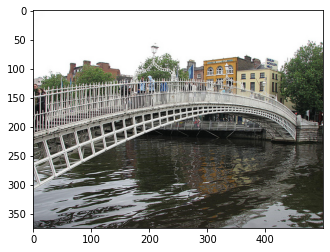

In [ ]:
img_gallery = cv2.imread(gallery_paths[0])
img_gallery = cv2.cvtColor(img_gallery, cv2.COLOR_BGR2RGB)
imshow(img_gallery)
print(gallery_classes[0])

1


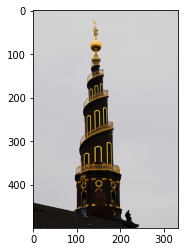

In [ ]:
img_training = cv2.imread(training_paths[0])
img_training = cv2.cvtColor(img_training, cv2.COLOR_BGR2RGB)
imshow(img_training)
print(training_classes[0])

18


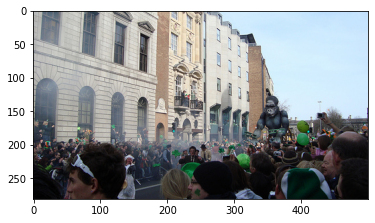

In [ ]:
img_query = cv2.imread(query_paths[0])
img_query = cv2.cvtColor(img_query, cv2.COLOR_BGR2RGB)
imshow(img_query)
print(query_classes[0])

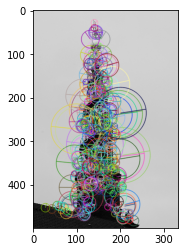

In [ ]:
surf = cv2.xfeatures2d.SURF_create(800)
img_rgb = cv2.imread(training_paths[0])
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
keypoints, descriptor = surf.detectAndCompute(img_gray, None)

img_sift=cv2.drawKeypoints(img_gray,keypoints,img_rgb,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imshow(img_sift)


In [ ]:
class FeatureExtractor(object):

    def __init__(self, feature_extractor, model, out_dim=20, scale=None,
                 subsample=100):

        # the provided feature extractor
        self.feature_extractor = feature_extractor

        # the clustering model
        self.model = model

        # the scaler -> scale feats to the same interval
        self.scale = scale

        # if defined, we collect subsample SIFT desc form each img
        self.subsample = subsample

    def get_descriptor(self, img_path):
        # read image
        img = cv2.imread(img_path)
        # convert to grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # get kp and descriptors, we use descriptors only
        kp, descs = self.feature_extractor.detectAndCompute(img, None)
        return descs


    def fit_model(self, data_list):
        training_feats = []
        # we extact SIFT descriptors
        for img_path in tqdm(data_list, desc='Fit extraction'):
            # we get sift desctiptors for img_path
            descs = self.get_descriptor(img_path)

            # if None == no descriptors we continue
            if descs is None:
                continue
            
            # if subsample, we choose randomly subsample descriptors
            if self.subsample:
                sub_idx = np.random.choice(np.arange(descs.shape[0]), self.subsample)
                descs = descs[sub_idx, :]

            # we append descriptors
            training_feats.append(descs)
        # we concatenate
        training_feats = np.concatenate(training_feats)
        print('--> Model trained on {} features'.format(training_feats.shape))
        # we fit the model
        self.model.fit(training_feats)
        print('--> Model fitted')


    def fit_scaler(self, data_list):
        # similar to fit_model
        # we get features mapped from the model
        features = self.extract_features(data_list)
        print('--> Scale trained on {}'.format(features.shape))
        # we fit the scaler
        self.scale.fit(features)
        print('--> Scale fitted')


    def extract_features(self, data_list):
        # we init features
        features = np.zeros((len(data_list), self.model.n_clusters))

        for i, img_path in enumerate(tqdm(data_list, desc='Extraction')):
            # get descriptor
            descs = self.get_descriptor(img_path)
            # 2220x128 descs
            preds = self.model.predict(descs)
            # 2220x1
            histo, _ = np.histogram(preds, bins=np.arange(self.model.n_clusters+1), density=True)
            # append histogram
            features[i, :] = histo

        return features


    def scale_features(self, features):
        # we return the normalized features
        return self.scale.transform(features)

Build the algorithm


In [ ]:
surf_extractor = cv2.xfeatures2d.SURF_create()

# we define model for clustering
output_dim = 20
model = KMeans(n_clusters=output_dim, n_init=10, max_iter=8000, verbose=1)
scale = StandardScaler()

In [ ]:
extractor = FeatureExtractor(surf_extractor=surf_extractor,
                             model=model,
                             scale=scale,
                             out_dim=output_dim)

In [ ]:
extractor.fit_model(training_paths)

NameError: ignored

In [ ]:
# we fit the scaler
extractor.fit_scaler(training_paths)

Extraction: 100%|██████████| 697/697 [03:28<00:00,  3.34it/s]

--> Scale trained on (697, 20)
--> Scale fitted


In [ ]:
# we get query features
query_features = extractor.extract_features(query_paths)
query_features = extractor.scale_features(query_features)
# we get gallery features
gallery_features = extractor.extract_features(gallery_paths)
gallery_features = extractor.scale_features(gallery_features)

print(gallery_features.shape, query_features.shape)

Extraction: 100%|██████████| 534/534 [06:42<00:00,  1.33it/s]

(534, 20) (70, 20)


In [ ]:
# we use cdis to make it in one pass
# NB: minkowski with p=2 == euclidean distance
pairwise_dist = spatial.distance.cdist(query_features, gallery_features, 'minkowski', p=2.)

print('--> Computed distances and got c-dist {}'.format(pairwise_dist.shape))

# we sort mathed indices
indices = np.argsort(pairwise_dist, axis=-1)

--> Computed distances and got c-dist (70, 534)


In [ ]:
gallery_matches = gallery_classes[indices]

evaluation

In [ ]:
def topk_accuracy(gt_label, matched_label, k=1):
    # get top-k matches
    matched_label = matched_label[:, :k]

    # init total and correct
    total = matched_label.shape[0]
    correct = 0
    for q_idx, q_lbl in enumerate(gt_label):
        # if any of the top-k label is correct, increase correct
        correct+= np.any(q_lbl == matched_label[q_idx, :]).item()
    acc_tmp = correct/total

    return acc_tmp



In [ ]:
print(' RESULTS ') 

for k in [1, 3, 10]:
    topk_acc = topk_accuracy(query_classes,gallery_matches, k )
    print('--> Top-{:d} Accuracy: {:.3f}'.format(k, topk_acc))  

 RESULTS 
--> Top-1 Accuracy: 0.557
--> Top-3 Accuracy: 0.743
--> Top-10 Accuracy: 0.871


random 

In [ ]:
random_indices = np.random.randint(len(gallery_paths),
                                   size=(len(query_paths),len(gallery_paths)))

random_matches = gallery_classes[random_indices]

print('########## RANDOM RESULTS ##########')

for k in [1, 3, 10]:
    topk_acc = topk_accuracy(query_classes, random_matches, k)
    results='--> Top-{:d} Accuracy: {:.3f}'.format(k, topk_acc)
    print(results)

########## RANDOM RESULTS ##########
--> Top-1 Accuracy: 0.029
--> Top-3 Accuracy: 0.043
--> Top-10 Accuracy: 0.171


match images

In [ ]:
def match_img(query_img_feat):
  distance = np.linalg.norm(gallery_features - query_img_feat, axis=1) #vectorial distance
  acc = np.argsort(distance)[:5]  #top 5 results
  scores = [(distance[a], gallery_paths[a]) for a in acc] #rank the results
  return (acc, scores)

In [ ]:
match_img(query_features[0])

NameError: ignored

viz

Query class: 18


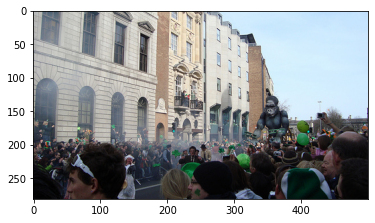

In [ ]:
img_query = cv2.imread(query_paths[0])
img_query = cv2.cvtColor(img_query, cv2.COLOR_BGR2RGB)
imshow(img_query)
print('Query class: {}'.format(query_classes[0]))

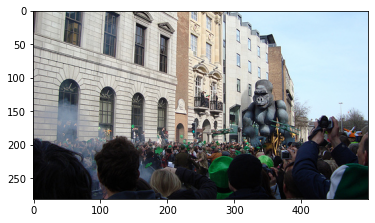

In [ ]:
# select a random query, vedi se giusta da sopra
viz_indices = indices[0]
top_1 = viz_indices[0]

img_match = cv2.imread(gallery_paths[top_1])
img_match = cv2.cvtColor(img_match, cv2.COLOR_BGR2RGB)
plt.imshow(img_match)

In [ ]:
test_path= os.path.join(data_path, "test")

gallery_path = os.path.join(test_path, 'gallery')
query_path = os.path.join(test_path, 'query')

def imag_load(path) : 
  temp_images = os.listdir(path)
  lista = []
  for i in temp_images:
    img_tmp = os.path.join(path, i)
    lista.append(img_tmp)
  return lista

gallery = imag_load(gallery_path)
query = imag_load(query_path)

In [ ]:
def match_img(one_image_query):
  distance_list = []
  for g_img in image_gallery:
    preds = model.predict([one_image_query, g_img])
    dist = preds[0][0]
    distance_list.append(dist)
  top10 = np.argsort(distance_list)[:10]  #top 10 results 
  scores = [(distance_list[a], gallery[a]) for a in top10] #rank the results
  return scores

In [ ]:

from pprint import pprint
results = {}
for img in query_paths : 
  #results[img] = []
  results[os.path.basename(img)] = []
for i, feat in enumerate(query_features) : 
  acc, scores = match_img(feat)
  #results[query_paths[i]].extend([sc[1] for sc in scores])
  results[os.path.basename(query_paths[i])].extend([os.path.basename(sc[1]) for sc in scores])
pprint(results)


{'ec50k_00020001.jpg': ['ec50k_00020011.jpg',
                        'ec50k_00020009.jpg',
                        '3549009497_b449467d76.jpg',
                        'ec50k_00020008.jpg',
                        'ec50k_00130009.jpg'],
 'ec50k_00020002.jpg': ['ec50k_00020013.jpg',
                        'ec50k_00020008.jpg',
                        'ec50k_00020010.jpg',
                        '3549009497_b449467d76.jpg',
                        'ec50k_00020009.jpg'],
 'ec50k_00020003.jpg': ['ec50k_00020011.jpg',
                        'ec50k_00020008.jpg',
                        'ec50k_00020013.jpg',
                        '3549009497_b449467d76.jpg',
                        '3312839216_6623af4e01.jpg'],
 'ec50k_00020004.jpg': ['ec50k_00020013.jpg',
                        'ec50k_00020010.jpg',
                        'ec50k_00020008.jpg',
                        'ec50k_00020009.jpg',
                        'ec50k_00020006.jpg'],
 'ec50k_00020005.jpg': ['ec50k_00020013.jpg',
  

In [ ]:
import requests
import json

url = "http://ec2-18-191-24-254.us-east-2.compute.amazonaws.com/competition/"


In [ ]:
mydata = dict()
mydata['groupname'] = "lesdesesperadas"


res = results
mydata["images"] = res
pprint(mydata)

{'groupname': 'lesdesesperadas',
 'images': {'ec50k_00020001.jpg': ['ec50k_00020011.jpg',
                                   'ec50k_00020009.jpg',
                                   '3549009497_b449467d76.jpg',
                                   'ec50k_00020008.jpg',
                                   'ec50k_00130009.jpg'],
            'ec50k_00020002.jpg': ['ec50k_00020013.jpg',
                                   'ec50k_00020008.jpg',
                                   'ec50k_00020010.jpg',
                                   '3549009497_b449467d76.jpg',
                                   'ec50k_00020009.jpg'],
            'ec50k_00020003.jpg': ['ec50k_00020011.jpg',
                                   'ec50k_00020008.jpg',
                                   'ec50k_00020013.jpg',
                                   '3549009497_b449467d76.jpg',
                                   '3312839216_6623af4e01.jpg'],
            'ec50k_00020004.jpg': ['ec50k_00020013.jpg',
                        

In [ ]:
def submit(results, url):
    res = json.dumps(results)
    response = requests.post(url, res)
    result = json.loads(response.text)
    print(f"accuracy is {result['results']}")

submit(mydata, url)

accuracy is {'top1': 0.0, 'top3': 0.0, 'top10': 0.0}
